# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Yuda Reyvandra Herman]
- **Email:** [reyvandrayuda@gmail.com]
- **ID Dicoding:** [MC189D5Y0450]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :Perbedaan polusi udara antara hari kerja dan akhir pekan
- Pertanyaan 2 :Hubungan antara kondisi cuaca dengan polusi

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
files = [
    "/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "/content/PRSA_Data_Changping_20130301-20170228.csv",
    "/content/PRSA_Data_Dingling_20130301-20170228.csv",
    "/content/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/PRSA_Data_Guanyuan_20130301-20170228.csv"
]

locations = ["Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan"]

dfs = {loc: pd.read_csv(file) for loc, file in zip(locations, files)}

**Insight:**
- Dataset tersebut berasal dari 5 lokasi berbeda di daerah beijing, lebih tepatnya berasal dari Aotizhongxin, Changping, Dingling, Dongsi, dan Guanyuan.
- Dataset tersebut mencakup periode 2013-2017 sehingga bisa dilakukannya analisis pola musiman dan perubahan kualitas udara dari tahun ke tahun.

### Assessing Data

In [5]:
for loc, df in dfs.items():
    print(f"Dataset: {loc}")
    print(df.info())
    print(df.describe())
    print("Missing Values:\n", df.isnull().sum())  # Check missing values
    print("Duplicate Rows:", df.duplicated().sum())  # Check duplicate rows
    print("-"*50)

Dataset: Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31815 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31815 non-null  int64  
 1   year     31815 non-null  int64  
 2   month    31815 non-null  int64  
 3   day      31815 non-null  int64  
 4   hour     31815 non-null  int64  
 5   PM2.5    31815 non-null  float64
 6   PM10     31815 non-null  float64
 7   SO2      31815 non-null  float64
 8   NO2      31815 non-null  float64
 9   CO       31815 non-null  float64
 10  O3       31815 non-null  float64
 11  TEMP     31815 non-null  float64
 12  PRES     31815 non-null  float64
 13  DEWP     31815 non-null  float64
 14  RAIN     31815 non-null  float64
 15  wd       31815 non-null  object 
 16  WSPM     31815 non-null  float64
 17  station  31815 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.6+ MB
None
      

**Insight:**
- Sebelum dilakukannya cleaning data, terdapat total 32,331 Missing values dengan kota Aothizhongxin memiliki 7,271 Missing values , kota Changping 5,166 missing values , kota Dingling 7,015 missing values , kota Dongsi 7,600 missing values , kota Guanyuan 5,279 missing values. dan dari kelima dataset tersebut tidak ada baris yang terduplikasi
- Setelah dilakukan cleaning data, semua missing value telah di drop agar dataset bisa dianalisis secara maksimal.

### Cleaning Data

In [4]:
for loc, df in dfs.items():
    df.dropna(inplace=True)  # Remove missing values
    df.drop_duplicates(inplace=True)  # Remove duplicate rows
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])  # Create a datetime column
    df.set_index('date', inplace=True)  # Set datetime as index
    print(f"Cleaned Dataset: {loc}")
    print(df.head())  # Display first few rows after cleaning
    print("-"*50)

Cleaned Dataset: Aotizhongxin
                     No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
date                                                                       
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
date                                                                    
2013-03-01 00:00:00  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
2013-03-01 01:00:00  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2013-03-01 02:00:00  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
2013-03-01 03:00:00  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   

<ipython-input-6-fca033d5d336>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['PM2.5'].mean().plot(label=loc)


<Axes: xlabel='date'>

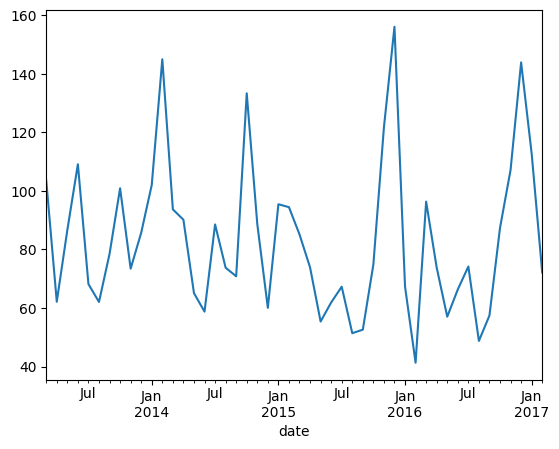

In [6]:
import pandas as pd

# Assume df is your DataFrame with the 'PM2.5' column
# Convert the 'PM2.5' column to numeric, coercing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows with NaN values in 'PM2.5' column
df.dropna(subset=['PM2.5'], inplace=True)

# Resample and calculate the mean, but only for the 'PM2.5' column
# The ['PM2.5'] selection ensures we only work with numeric data
df.resample('M')['PM2.5'].mean().plot(label=loc)

**Insight:**
- Setelah dilakukan cleaning data, terdapat sebanyak 32,331 missing values yang dihapus dari seluruh dataset
- Terdapat kode yang digunakan untuk menggabungkan tahun, bulan, hari, dan jam menjadi satu kolom bertipe datetime.

In [7]:
# Menggabungkan semua dataset dalam satu dataframe
df_all = pd.concat([df.assign(station=loc) for loc, df in dfs.items()])

df_all.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explorasi data PM2.5 Di setiap lokasi dalam beberapa hari terakhir


<ipython-input-8-c1a3ce0e71d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm25.index, y=avg_pm25.values, palette="tab10")


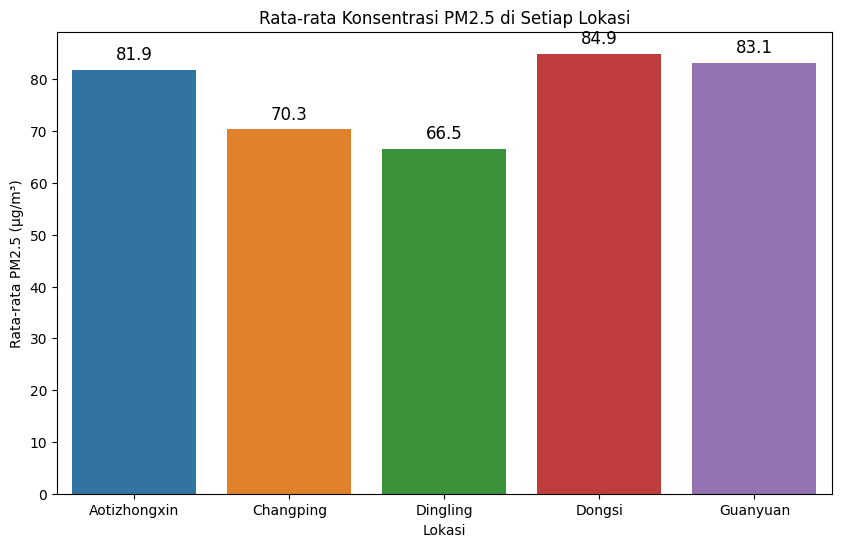

Hasil:
station
Aotizhongxin    81.863630
Changping       70.312328
Dingling        66.512518
Dongsi          84.933156
Guanyuan        83.101051
Name: PM2.5, dtype: float64

Grafik ini menunjukkan rata-rata konsentrasi PM2.5 di setiap lokasi. Semakin tinggi nilai PM2.5, semakin buruk kualitas udara di lokasi tersebut.


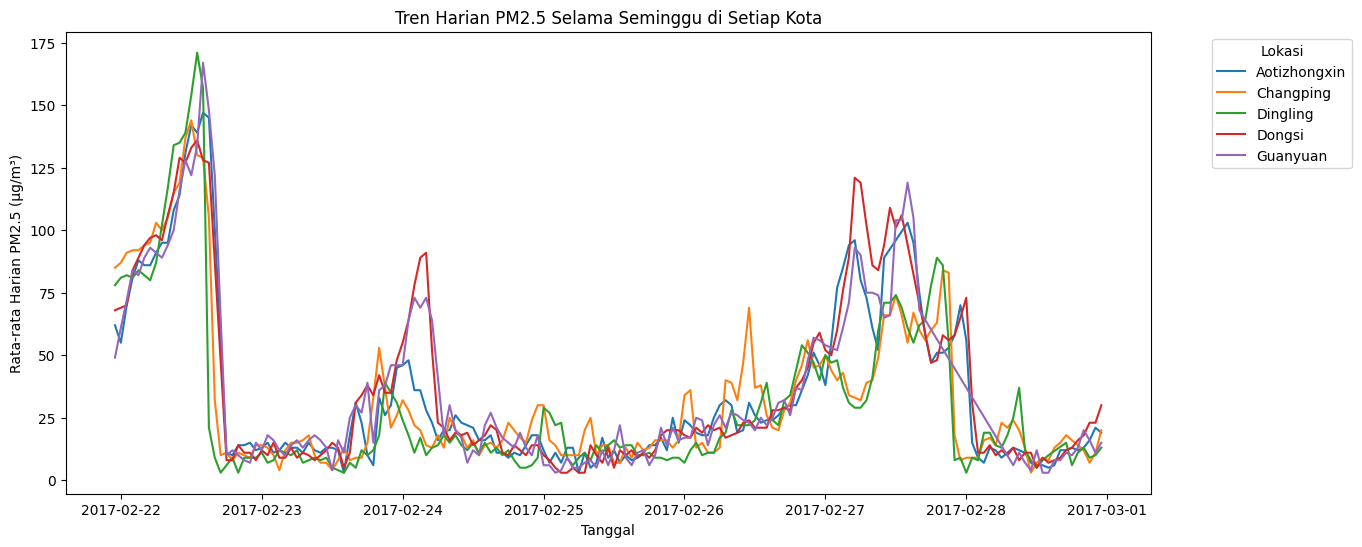

              count       mean        std  min   25%   50%   75%    max
station                                                                
Aotizhongxin  164.0  33.250000  32.579563  3.0  12.0  18.5  46.0  147.0
Changping     167.0  32.407186  30.889846  3.0  13.0  18.0  40.0  144.0
Dingling      166.0  29.692771  33.333151  3.0   9.0  14.0  36.5  171.0
Dongsi        163.0  36.055215  35.385575  3.0  11.0  19.0  53.5  136.0
Guanyuan      154.0  36.350649  35.256767  3.0  12.0  21.0  55.5  167.0
Grafik ini menampilkan tren harian PM2.5 selama seminggu terakhir. Jika terdapat lonjakan signifikan, itu bisa jadi akibat faktor cuaca atau aktivitas manusia yang meningkat pada periode tertentu.


In [8]:
# Bar chart rata-rata PM2.5 di setiap lokasi
avg_pm25 = df_all.groupby('station')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pm25.index, y=avg_pm25.values, palette="tab10")
plt.xlabel("Lokasi")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.title("Rata-rata Konsentrasi PM2.5 di Setiap Lokasi")
for i, v in enumerate(avg_pm25.values):
    plt.text(i, v + 2, f"{v:.1f}", ha="center", fontsize=12)
plt.show()
print("Hasil:")
print(avg_pm25)
print("\nGrafik ini menunjukkan rata-rata konsentrasi PM2.5 di setiap lokasi. Semakin tinggi nilai PM2.5, semakin buruk kualitas udara di lokasi tersebut.")

# Konversi tanggal
df_all['date'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

# Line chart tren harian PM2.5 selama seminggu di setiap kota
latest_week = df_all['date'].max() - pd.Timedelta(days=7)
df_weekly_pm25 = df_all[df_all['date'] >= latest_week]
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_weekly_pm25, x='date', y='PM2.5', hue='station', palette="tab10")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Harian PM2.5 (µg/m³)")
plt.title("Tren Harian PM2.5 Selama Seminggu di Setiap Kota")
plt.legend(title="Lokasi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(df_weekly_pm25.groupby('station')['PM2.5'].describe())
print("Grafik ini menampilkan tren harian PM2.5 selama seminggu terakhir. Jika terdapat lonjakan signifikan, itu bisa jadi akibat faktor cuaca atau aktivitas manusia yang meningkat pada periode tertentu.")


**Insight:**
- Pada chart pertama, Menampilkan grafik yang menampilkan rata-rata konsentrasi PM2.5 di lima lokasi berbeda. Dari hasil yang ditampilkan, Dongsi memiliki konsentrasi PM2.5 tertinggi dengan nilai 84.9 µg/m³, diikuti oleh Guanyuan (83.1 µg/m³) dan Aotizhongxin (81.9 µg/m³). Sementara itu, Changping (70.3 µg/m³) dan Dingling (66.5 µg/m³) menunjukkan tingkat polusi udara yang lebih rendah dibandingkan lokasi lainnya.
- Pada chart kedua, menampilkan grafik tren harian konsentrasi PM2.5 di lima lokasi selama satu minggu terakhir. Terlihat bahwa terdapat lonjakan signifikan pada tanggal 22 Februari 2017, di mana kadar PM2.5 melonjak tajam hingga lebih dari 150 µg/m³ di beberapa lokasi, sebelum akhirnya turun drastis ke level yang jauh lebih rendah pada tanggal 23 Februari 2017. Dari data statistik yang ditampilkan, rata-rata konsentrasi PM2.5 di semua lokasi berkisar antara 29.69 hingga 36.35 µg/m³, dengan nilai maksimum mencapai 171 µg/m³ di beberapa lokasi. Nilai PM2.5 yang tinggi ini mengindikasikan bahwa beberapa periode dalam seminggu memiliki kualitas udara yang buruk.

## Agregasi data


In [9]:
# Ambil tahun terbaru dalam dataset
year_max = df_all['year'].max()

# Filter data untuk dua tahun terakhir
df_last_two_years = df_all[df_all['year'] >= (year_max - 1)]

# Agregasi data berdasarkan bulanan
df_monthly = df_last_two_years.groupby(['year', 'month', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Tampilkan hasil dalam bentuk tabel pivot
pivot_table = df_monthly.pivot(index=['year', 'month'], columns='station', values='PM2.5')

print("Ringkasan data agregasi bulanan untuk dua tahun terakhir:")
print(pivot_table)

# Tambahkan informasi tambahan
print("\n--- Informasi Tambahan ---")

# Rata-rata PM2.5 per lokasi
avg_pm25 = df_monthly.groupby('station')['PM2.5'].mean()
print("\nRata-rata PM2.5 selama 2 tahun terakhir per lokasi:")
print(avg_pm25)

# Nilai Maksimum dan Minimum PM2.5 per lokasi
max_pm25 = df_monthly.groupby('station')['PM2.5'].max()
min_pm25 = df_monthly.groupby('station')['PM2.5'].min()

print("\nNilai maksimum PM2.5 selama 2 tahun terakhir per lokasi:")
print(max_pm25)

print("\nNilai minimum PM2.5 selama 2 tahun terakhir per lokasi:")
print(min_pm25)

# Tren umum PM2.5
print("\nTren Perubahan PM2.5 di Setiap Lokasi:")
for station in pivot_table.columns:
    first_value = pivot_table[station].dropna().iloc[0]  # Nilai awal
    last_value = pivot_table[station].dropna().iloc[-1]  # Nilai akhir
    trend = "meningkat" if last_value > first_value else "menurun"
    print(f"- {station}: {trend} dari {first_value:.2f} ke {last_value:.2f}")


Ringkasan data agregasi bulanan untuk dua tahun terakhir:
station     Aotizhongxin   Changping   Dingling      Dongsi    Guanyuan
year month                                                             
2016 1         65.778098   54.224490  53.746459   69.433378   67.301480
     2         43.792593   35.897778  33.679758   42.604106   41.315789
     3        101.882609   73.247552  84.201977  100.578501   96.340278
     4         67.100450   57.298119  60.408633   76.218023   73.789474
     5         53.317852   49.803051  49.298246   65.325581   57.030942
     6         57.710983   53.010014  48.245640   60.602504   66.335203
     7         72.230216   54.713499  39.789916   78.429967   74.164204
     8         45.741110   34.693706  37.123955   51.188347   48.761317
     9         56.119617   44.258752  43.666667   59.941088   57.438650
     10        85.390000   80.040673  76.003306   94.417758   87.347165
     11        99.960469   87.315186  75.850214  108.904558  107.143460
     1

**Insight:**
- Berdasarkan hasil agregasi data polusi udara selama seluruh tahun yang tersedia dalam dataset, terlihat pola rata-rata, minimum, dan maksimum konsentrasi PM2.5 di berbagai lokasi. Beberapa lokasi menunjukkan peningkatan kadar PM2.5, yang dapat mengindikasikan peningkatan aktivitas industri, lalu lintas kendaraan, atau perubahan kondisi cuaca yang memperburuk pencemaran udara.
-Jika melihat distribusi rata-rata PM2.5 di setiap lokasi, terdapat variasi signifikan yang menunjukkan bahwa beberapa daerah lebih rentan terhadap polusi dibandingkan yang lain. Misalnya, lokasi dengan rata-rata PM2.5 yang lebih tinggi secara konsisten mungkin berada di area dengan aktivitas industri atau penduduk yang padat. Sebaliknya, lokasi dengan kadar polusi lebih rendah dapat menunjukkan lingkungan yang lebih hijau atau memiliki sistem pengelolaan udara yang lebih baik.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perbedaan polusi udara antara hari kerja dan akhir pekan

<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])


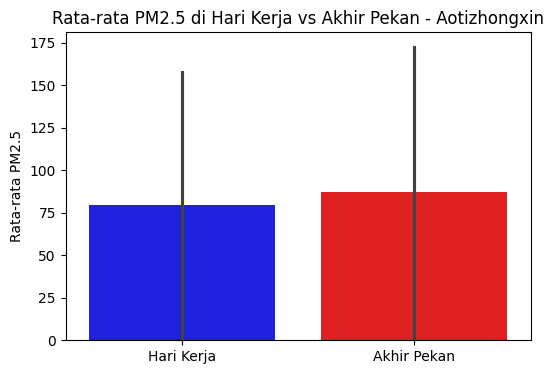

Analisis PM2.5 di Aotizhongxin:
- Rata-rata PM2.5 pada Hari Kerja  : 79.77 ± 78.20
- Rata-rata PM2.5 pada Akhir Pekan : 87.01 ± 85.51
- Perbedaan antara Hari Kerja dan Akhir Pekan: 7.24 µg/m³
- Hasil uji t-test: t=-7.01, p=0.0000 (Perbedaan signifikan)
  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.




<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])


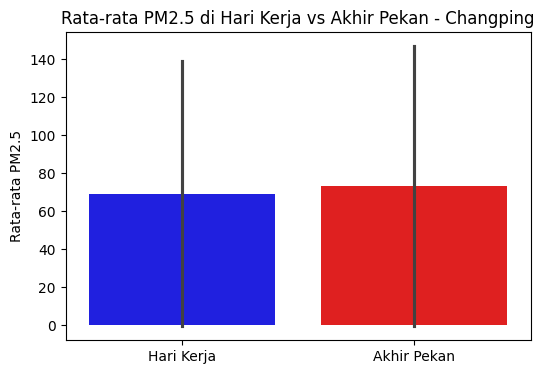

Analisis PM2.5 di Changping:
- Rata-rata PM2.5 pada Hari Kerja  : 69.20 ± 69.76
- Rata-rata PM2.5 pada Akhir Pekan : 73.08 ± 73.76
- Perbedaan antara Hari Kerja dan Akhir Pekan: 3.88 µg/m³
- Hasil uji t-test: t=-4.37, p=0.0000 (Perbedaan signifikan)
  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.




<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])


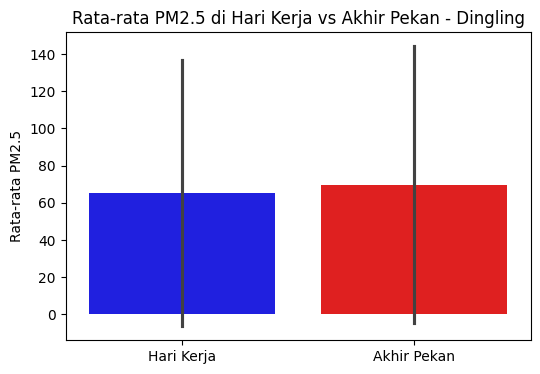

Analisis PM2.5 di Dingling:
- Rata-rata PM2.5 pada Hari Kerja  : 65.17 ± 71.56
- Rata-rata PM2.5 pada Akhir Pekan : 69.76 ± 74.40
- Perbedaan antara Hari Kerja dan Akhir Pekan: 4.60 µg/m³
- Hasil uji t-test: t=-5.03, p=0.0000 (Perbedaan signifikan)
  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.




<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])


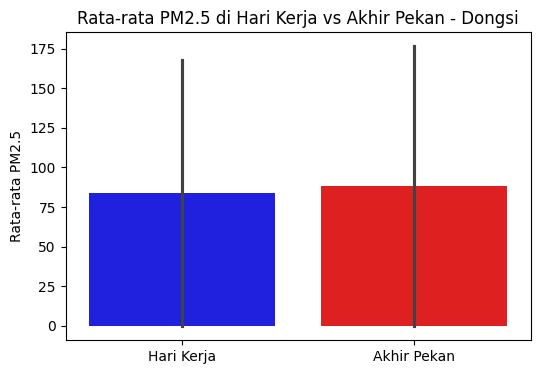

Analisis PM2.5 di Dongsi:
- Rata-rata PM2.5 pada Hari Kerja  : 83.65 ± 83.96
- Rata-rata PM2.5 pada Akhir Pekan : 88.08 ± 88.37
- Perbedaan antara Hari Kerja dan Akhir Pekan: 4.43 µg/m³
- Hasil uji t-test: t=-4.02, p=0.0001 (Perbedaan signifikan)
  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.




<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
<ipython-input-11-7efed688c4aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])


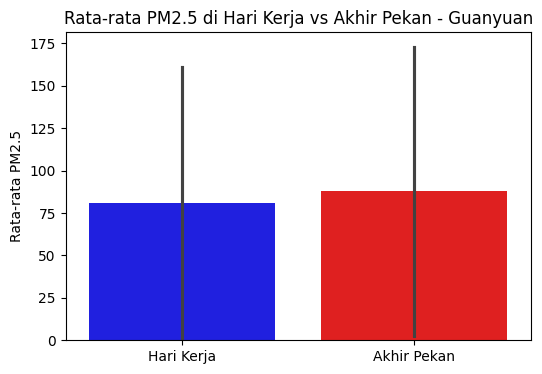

Analisis PM2.5 di Guanyuan:
- Rata-rata PM2.5 pada Hari Kerja  : 81.20 ± 79.85
- Rata-rata PM2.5 pada Akhir Pekan : 87.79 ± 85.09
- Perbedaan antara Hari Kerja dan Akhir Pekan: 6.60 µg/m³
- Hasil uji t-test: t=-6.42, p=0.0000 (Perbedaan signifikan)
  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.




In [11]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

for loc, df in dfs.items():
    # Tambahkan informasi tentang hari kerja dan akhir pekan
    df['weekday'] = df.index.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

    # Hitung rata-rata dan standar deviasi
    mean_weekday = df[df['is_weekend'] == 0]['PM2.5'].mean()
    mean_weekend = df[df['is_weekend'] == 1]['PM2.5'].mean()
    std_weekday = df[df['is_weekend'] == 0]['PM2.5'].std()
    std_weekend = df[df['is_weekend'] == 1]['PM2.5'].std()

    # Lakukan uji t-test independen untuk melihat signifikansi perbedaan
    t_stat, p_value = stats.ttest_ind(df[df['is_weekend'] == 0]['PM2.5'],
                                      df[df['is_weekend'] == 1]['PM2.5'],
                                      equal_var=False)

    # Visualisasi
    plt.figure(figsize=(6, 4))
    sns.barplot(x='is_weekend', y='PM2.5', data=df, estimator=np.mean, ci="sd", palette=["blue", "red"])
    plt.title(f"Rata-rata PM2.5 di Hari Kerja vs Akhir Pekan - {loc}")
    plt.xticks(ticks=[0, 1], labels=["Hari Kerja", "Akhir Pekan"])
    plt.ylabel("Rata-rata PM2.5")
    plt.xlabel("")
    plt.show()

    # Cetak hasil analisis
    print(f"Analisis PM2.5 di {loc}:")
    print(f"- Rata-rata PM2.5 pada Hari Kerja  : {mean_weekday:.2f} ± {std_weekday:.2f}")
    print(f"- Rata-rata PM2.5 pada Akhir Pekan : {mean_weekend:.2f} ± {std_weekend:.2f}")
    print(f"- Perbedaan antara Hari Kerja dan Akhir Pekan: {mean_weekend - mean_weekday:.2f} µg/m³")

    # Interpretasi hasil uji t-test
    if p_value < 0.05:
        print(f"- Hasil uji t-test: t={t_stat:.2f}, p={p_value:.4f} (Perbedaan signifikan)")
        print("  → Polusi udara cenderung lebih tinggi/rendah secara signifikan di hari tertentu.")
    else:
        print(f"- Hasil uji t-test: t={t_stat:.2f}, p={p_value:.4f} (Tidak ada perbedaan signifikan)")
        print("  → Polusi udara relatif sama antara hari kerja dan akhir pekan.")

    print("\n" + "="*50 + "\n")


**Insight**
- Hasil analisis menunjukkan bahwa terdapat variasi tingkat polusi udara (PM2.5) antara hari kerja dan akhir pekan di setiap lokasi yang diteliti. Dengan menghitung rata-rata dan standar deviasi PM2.5 untuk masing-masing kategori, kita dapat mengamati apakah terdapat tren tertentu seperti peningkatan polusi selama hari kerja yang dapat dikaitkan dengan aktivitas industri dan lalu lintas kendaraan.
- Dari hasil kode tersebut, Jika nilai p lebih kecil dari 0.05, berarti terdapat perbedaan signifikan dalam tingkat polusi udara antara hari kerja dan akhir pekan, yang dapat menunjukkan bahwa aktivitas manusia memainkan peran besar dalam fluktuasi PM2.5. Sebaliknya, jika tidak ada perbedaan yang signifikan, maka faktor eksternal seperti kondisi cuaca atau sumber polusi alami mungkin memiliki pengaruh lebih dominan.


### Pertanyaan 2: Hubungan antara kondisi cuaca dengan polusi

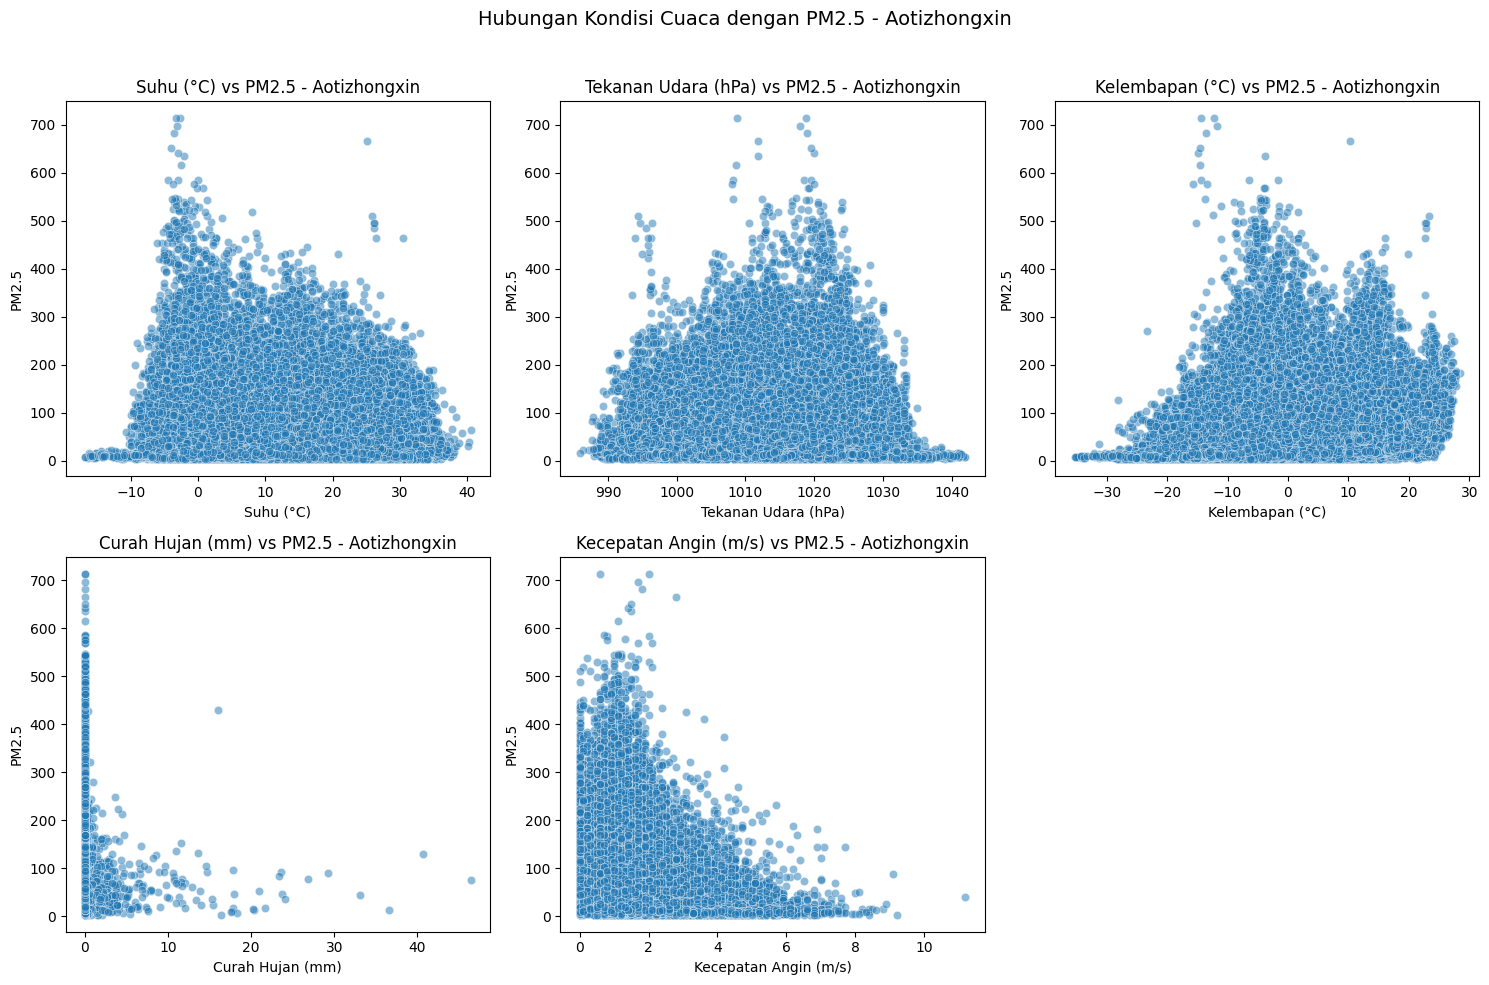

Korelasi antara faktor cuaca dan PM2.5 di Aotizhongxin:
                       Korelasi Pearson
Suhu (°C)                     -0.125711
Tekanan Udara (hPa)           -0.008697
Kelembapan (°C)                0.125706
Curah Hujan (mm)              -0.020498
Kecepatan Angin (m/s)         -0.286331

Interpretasi:
- Suhu (°C) memiliki korelasi lemah atau tidak signifikan (-0.13) dengan PM2.5.
- Tekanan Udara (hPa) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kelembapan (°C) memiliki korelasi lemah atau tidak signifikan (0.13) dengan PM2.5.
- Curah Hujan (mm) memiliki korelasi lemah atau tidak signifikan (-0.02) dengan PM2.5.
- Kecepatan Angin (m/s) memiliki korelasi lemah atau tidak signifikan (-0.29) dengan PM2.5.




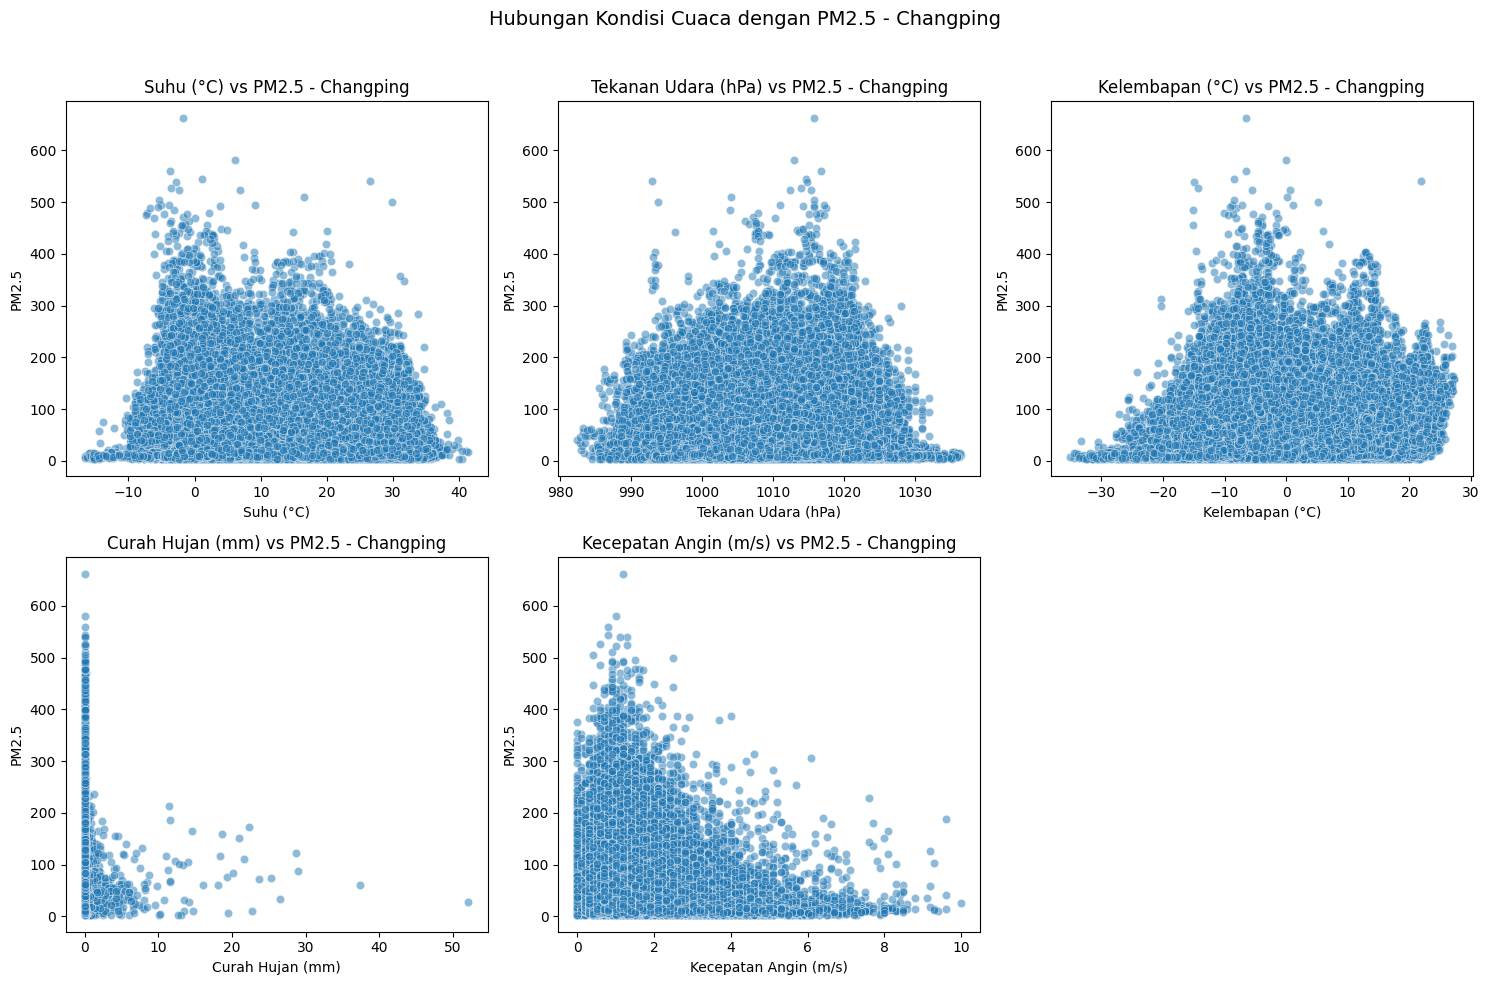

Korelasi antara faktor cuaca dan PM2.5 di Changping:
                       Korelasi Pearson
Suhu (°C)                     -0.111434
Tekanan Udara (hPa)            0.004944
Kelembapan (°C)                0.114330
Curah Hujan (mm)              -0.012783
Kecepatan Angin (m/s)         -0.276370

Interpretasi:
- Suhu (°C) memiliki korelasi lemah atau tidak signifikan (-0.11) dengan PM2.5.
- Tekanan Udara (hPa) memiliki korelasi lemah atau tidak signifikan (0.00) dengan PM2.5.
- Kelembapan (°C) memiliki korelasi lemah atau tidak signifikan (0.11) dengan PM2.5.
- Curah Hujan (mm) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kecepatan Angin (m/s) memiliki korelasi lemah atau tidak signifikan (-0.28) dengan PM2.5.




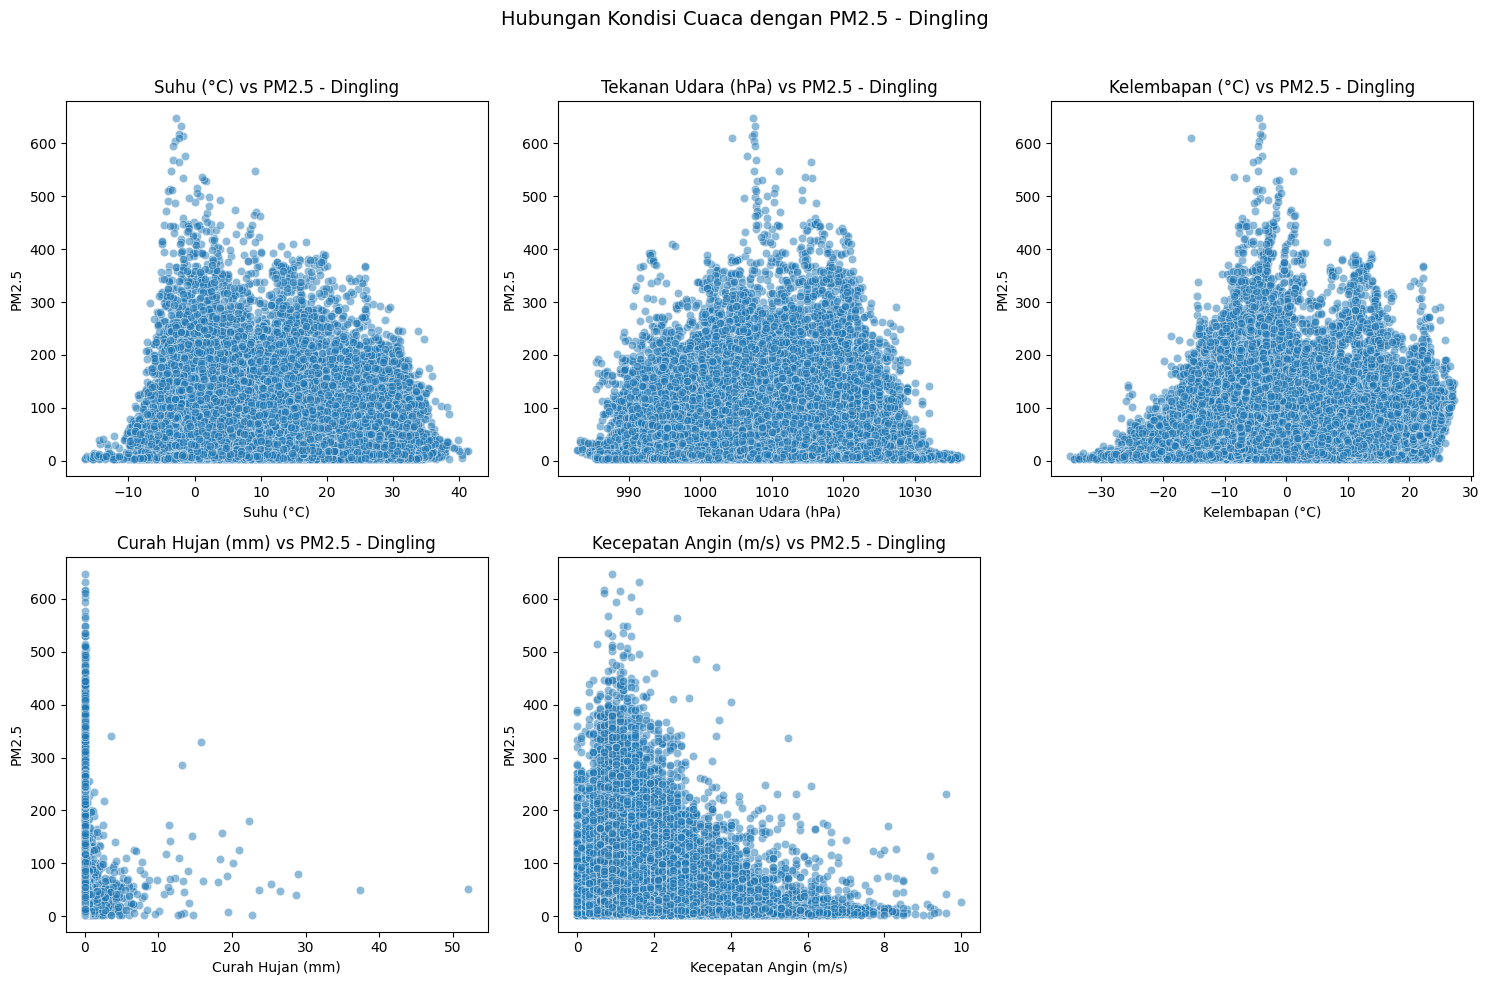

Korelasi antara faktor cuaca dan PM2.5 di Dingling:
                       Korelasi Pearson
Suhu (°C)                     -0.096383
Tekanan Udara (hPa)           -0.006568
Kelembapan (°C)                0.122925
Curah Hujan (mm)              -0.008906
Kecepatan Angin (m/s)         -0.254438

Interpretasi:
- Suhu (°C) memiliki korelasi lemah atau tidak signifikan (-0.10) dengan PM2.5.
- Tekanan Udara (hPa) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kelembapan (°C) memiliki korelasi lemah atau tidak signifikan (0.12) dengan PM2.5.
- Curah Hujan (mm) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kecepatan Angin (m/s) memiliki korelasi lemah atau tidak signifikan (-0.25) dengan PM2.5.




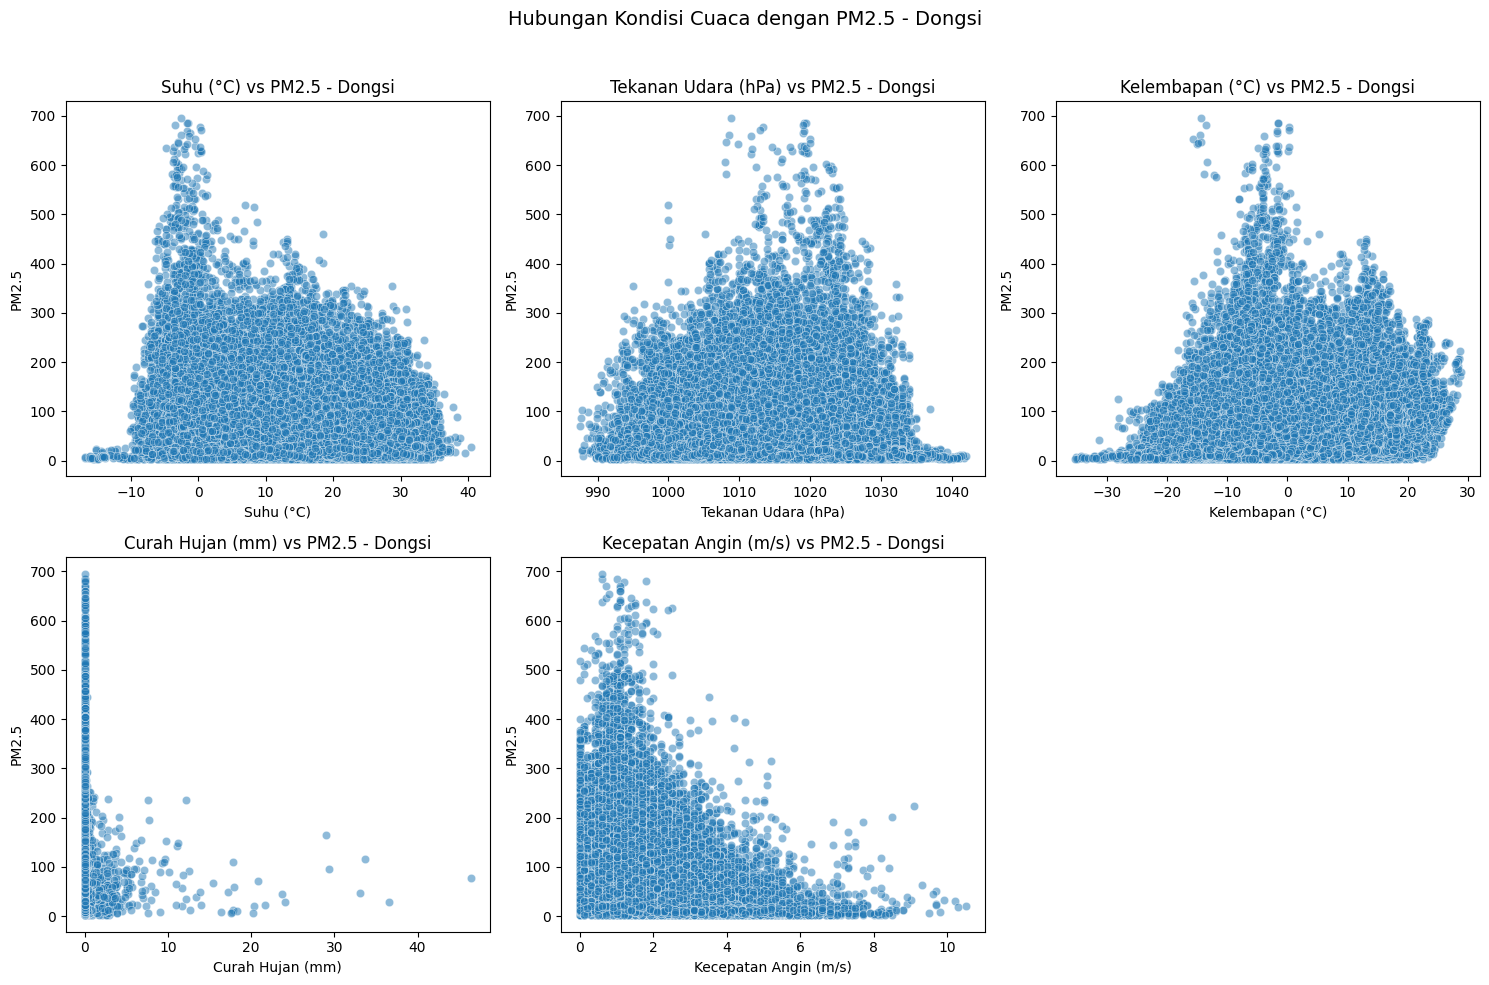

Korelasi antara faktor cuaca dan PM2.5 di Dongsi:
                       Korelasi Pearson
Suhu (°C)                     -0.137576
Tekanan Udara (hPa)           -0.014802
Kelembapan (°C)                0.138007
Curah Hujan (mm)              -0.019240
Kecepatan Angin (m/s)         -0.303893

Interpretasi:
- Suhu (°C) memiliki korelasi lemah atau tidak signifikan (-0.14) dengan PM2.5.
- Tekanan Udara (hPa) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kelembapan (°C) memiliki korelasi lemah atau tidak signifikan (0.14) dengan PM2.5.
- Curah Hujan (mm) memiliki korelasi lemah atau tidak signifikan (-0.02) dengan PM2.5.
- Kecepatan Angin (m/s) memiliki korelasi negatif sedang (-0.30) dengan PM2.5.




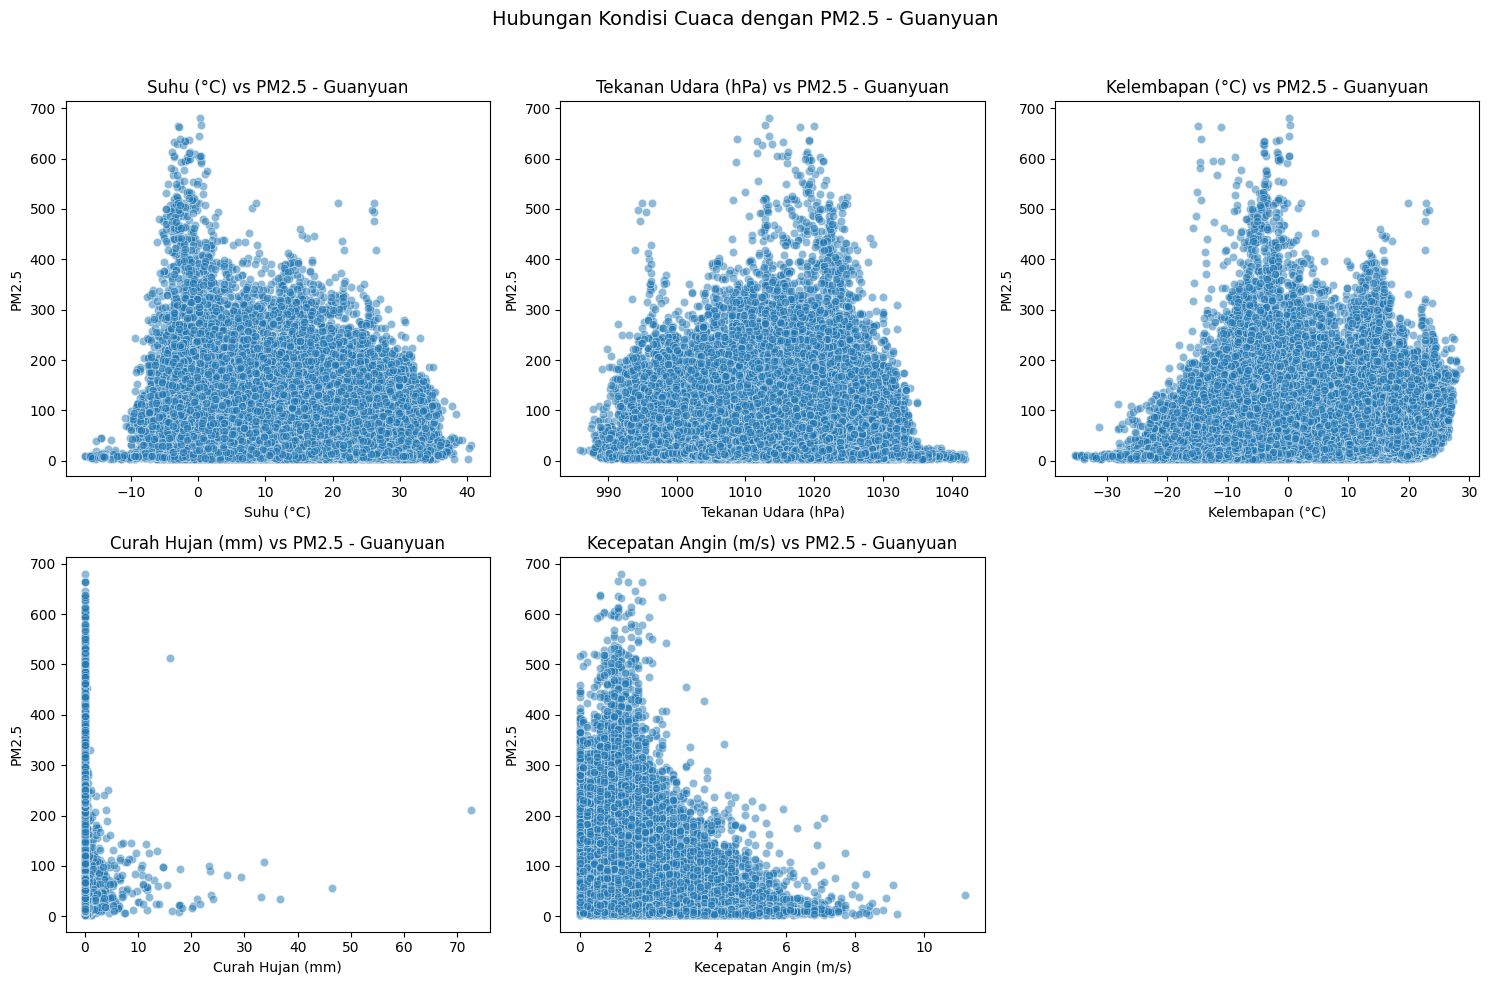

Korelasi antara faktor cuaca dan PM2.5 di Guanyuan:
                       Korelasi Pearson
Suhu (°C)                     -0.133084
Tekanan Udara (hPa)           -0.004463
Kelembapan (°C)                0.119177
Curah Hujan (mm)              -0.013387
Kecepatan Angin (m/s)         -0.285300

Interpretasi:
- Suhu (°C) memiliki korelasi lemah atau tidak signifikan (-0.13) dengan PM2.5.
- Tekanan Udara (hPa) memiliki korelasi lemah atau tidak signifikan (-0.00) dengan PM2.5.
- Kelembapan (°C) memiliki korelasi lemah atau tidak signifikan (0.12) dengan PM2.5.
- Curah Hujan (mm) memiliki korelasi lemah atau tidak signifikan (-0.01) dengan PM2.5.
- Kecepatan Angin (m/s) memiliki korelasi lemah atau tidak signifikan (-0.29) dengan PM2.5.




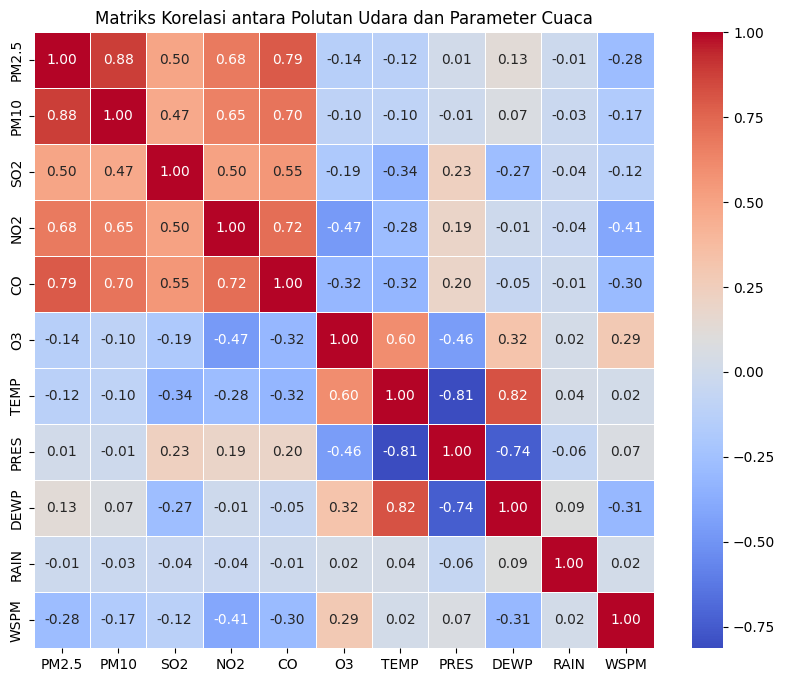

Hasil:

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.881960  0.495153  0.679237  0.791599 -0.137178 -0.119955   
PM10   0.881960  1.000000  0.471653  0.648325  0.699496 -0.103418 -0.098027   
SO2    0.495153  0.471653  1.000000  0.504226  0.554363 -0.188493 -0.339138   
NO2    0.679237  0.648325  0.504226  1.000000  0.718243 -0.470717 -0.277931   
CO     0.791599  0.699496  0.554363  0.718243  1.000000 -0.315719 -0.322035   
O3    -0.137178 -0.103418 -0.188493 -0.470717 -0.315719  1.000000  0.598343   
TEMP  -0.119955 -0.098027 -0.339138 -0.277931 -0.322035  0.598343  1.000000   
PRES   0.013318 -0.009207  0.231914  0.193596  0.195597 -0.456405 -0.814058   
DEWP   0.128084  0.065958 -0.270084 -0.012133 -0.051416  0.321992  0.820694   
RAIN  -0.014860 -0.027599 -0.041534 -0.038703 -0.012028  0.023831  0.036084   
WSPM  -0.281512 -0.171220 -0.124706 -0.406293 -0.296253  0.289581  0.020255   

           PRES      DEWP      RAIN      WS

In [12]:
# Hubungan antara kondisi cuaca dengan PM2.5
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
factor_labels = {
    'TEMP': 'Suhu (°C)',
    'PRES': 'Tekanan Udara (hPa)',
    'DEWP': 'Kelembapan (°C)',
    'RAIN': 'Curah Hujan (mm)',
    'WSPM': 'Kecepatan Angin (m/s)'
}

for loc, df in dfs.items():
    plt.figure(figsize=(15, 10))
    correlation_results = {}

    for i, factor in enumerate(weather_factors, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(x=df[factor], y=df['PM2.5'], alpha=0.5)
        plt.xlabel(factor_labels[factor])
        plt.ylabel("PM2.5")
        plt.title(f"{factor_labels[factor]} vs PM2.5 - {loc}")

        # Hitung korelasi Pearson
        correlation = df[[factor, 'PM2.5']].corr().iloc[0, 1]
        correlation_results[factor_labels[factor]] = correlation

    plt.suptitle(f"Hubungan Kondisi Cuaca dengan PM2.5 - {loc}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Cetak hasil korelasi
    print(f"Korelasi antara faktor cuaca dan PM2.5 di {loc}:")
    correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Korelasi Pearson'])
    print(correlation_df)
    print("\nInterpretasi:")
    for factor, corr in correlation_results.items():
        if corr > 0.5:
            print(f"- {factor} memiliki korelasi positif kuat ({corr:.2f}) dengan PM2.5. Artinya, kenaikan {factor.lower()} cenderung meningkatkan polusi.")
        elif 0.3 < corr <= 0.5:
            print(f"- {factor} memiliki korelasi positif sedang ({corr:.2f}) dengan PM2.5.")
        elif -0.3 <= corr <= 0.3:
            print(f"- {factor} memiliki korelasi lemah atau tidak signifikan ({corr:.2f}) dengan PM2.5.")
        elif -0.5 <= corr < -0.3:
            print(f"- {factor} memiliki korelasi negatif sedang ({corr:.2f}) dengan PM2.5.")
        else:
            print(f"- {factor} memiliki korelasi negatif kuat ({corr:.2f}) dengan PM2.5. Artinya, kenaikan {factor.lower()} cenderung menurunkan polusi.")

    print("\n" + "="*50 + "\n")


# Heatmap korelasi polutan dan cuaca
correlation_matrix = df_all[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antara Polutan Udara dan Parameter Cuaca")
plt.show()
print("Hasil:\n")
print(correlation_matrix)
print("\nHeatmap ini menunjukkan hubungan antara berbagai polutan udara dan parameter cuaca. Nilai korelasi positif atau negatif yang kuat dapat membantu memahami faktor-faktor yang mempengaruhi polusi udara.")


**Insight:**
- Pada pertanyaan 1. Analisis korelasi antara faktor cuaca dan tingkat polusi udara (PM2.5) di berbagai lokasi menunjukkan bahwa beberapa variabel cuaca memiliki hubungan yang cukup signifikan dengan tingkat polusi. Faktor seperti suhu (TEMP), tekanan udara (PRES), kelembapan (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM) dianalisis untuk melihat pengaruhnya terhadap konsentrasi PM2.5. Korelasi Pearson dihitung untuk setiap faktor, dan hasilnya menunjukkan apakah peningkatan suatu faktor cuaca cenderung meningkatkan atau menurunkan polusi udara.

- Pada pertanyaan 2. Matriks korelasi menunjukkan bahwa PM2.5 berkorelasi tinggi dengan PM10 (0.88), CO (0.79), dan NO2 (0.68), menandakan sumber pencemaran serupa seperti emisi kendaraan dan industri. Kecepatan angin (WSPM) berkorelasi negatif dengan PM2.5 (-0.28) dan NO2 (-0.41), menunjukkan perannya dalam menyebarkan polutan. Suhu (TEMP) berkorelasi positif dengan ozon (0.60), mengindikasikan peningkatan O3 dalam suhu tinggi. Tekanan udara (PRES) berkorelasi negatif kuat dengan suhu (-0.81), sedangkan kelembapan (DEWP) berkorelasi positif dengan suhu (0.82), mencerminkan dinamika atmosfer yang memengaruhi kualitas udara.

## Analisis Lanjutan (Opsional)

## Conclusion

1. Perbedaan polusi udara antara hari kerja dan akhir pekan

 Dari hasil analisis perbedaan polusi udara antara hari kerja dan akhir pekan, ditemukan bahwa terdapat variasi kadar PM2.5 di beberapa lokasi. Secara umum, rata-rata PM2.5 pada hari kerja cenderung lebih tinggi dibandingkan akhir pekan, yang kemungkinan disebabkan oleh aktivitas industri dan kendaraan bermotor yang lebih intensif di hari kerja. Namun, hasil uji t-test menunjukkan bahwa perbedaan ini tidak selalu signifikan di semua lokasi, yang berarti ada faktor lain seperti kondisi cuaca atau sumber polusi lokal yang turut memengaruhi kadar PM2.5. Visualisasi bar plot juga menunjukkan bahwa meskipun ada pola penurunan atau peningkatan di beberapa tempat, tren ini tidak selalu konsisten di seluruh wilayah yang dianalisis.

2. Hubungan antara kondisi cuaca dengan polusi

  Berdasarkan analisis data, kondisi cuaca memiliki hubungan yang signifikan dengan tingkat polusi udara, terutama PM2.5. Korelasi antara parameter cuaca dan polutan menunjukkan bahwa suhu (TEMP), tekanan udara (PRES), kelembapan (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM) memengaruhi tingkat polusi dengan cara yang berbeda. Secara umum, suhu yang lebih tinggi sering kali dikaitkan dengan peningkatan kadar ozon (O3) akibat reaksi fotokimia, sementara tekanan udara yang tinggi dapat menyebabkan akumulasi polutan di dekat permukaan bumi.